Our aim in this project  is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

first we import the relevant libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [ ]:
 pd.read_csv("c4 epa air dataset.csv")

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
...,...,...,...,...,...,...,...,...,...,...
255,255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9


In [ ]:
ads = pd.read_csv("c4 epa air dataset.csv")

In [ ]:
ads.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [ ]:
ads.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


In [ ]:
ads["state_name"].describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

In [ ]:
np.mean(ads["aqi"])

6.757692307692308

In [ ]:
np.median(ads["aqi"])

5.0

In [ ]:
np.min(ads["aqi"])

0

In [ ]:
np.max(ads["aqi"])

50

In [ ]:
np.std(ads["aqi"], ddof=1)

7.061706678820724

In [ ]:
pd.read_csv("c4 epa air dataset.csv")

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
...,...,...,...,...,...,...,...,...,...,...
255,255,2018-01-01,District Of Columbia,District of Columbia,Washington,Near Road,Carbon monoxide,Parts per million,0.244444,3
256,256,2018-01-01,Wisconsin,Dodge,Kekoskee,HORICON WILDLIFE AREA,Carbon monoxide,Parts per million,0.200000,2
257,257,2018-01-01,Kentucky,Jefferson,Louisville,CANNONS LANE,Carbon monoxide,Parts per million,0.163158,2
258,258,2018-01-01,Nebraska,Douglas,Omaha,NaN,Carbon monoxide,Parts per million,0.421053,9


In [ ]:
ads.shape

(260, 10)

Now, you want to find out whether aqi_log fits a specific type of probability distribution. Create a histogram to visualize the distribution of aqi_log. Then, based on its shape, visually determine if it resembles a particular distribution

Create a histogram to visualize distribution of aqi_log.

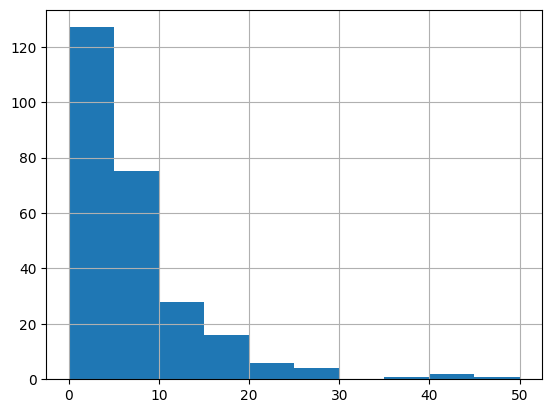

In [ ]:
ads["aqi"].hist();

right skewed

Another way to visually check if the data is normally distributed is to create and inspect a QQ (quantile-quantile) plot.

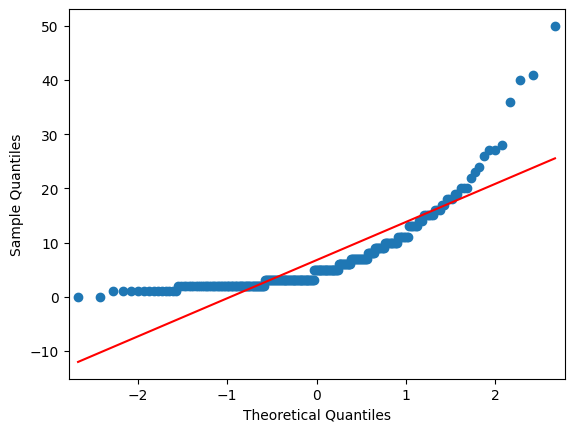

In [ ]:
fig = sm.qqplot(ads["aqi"], line='s')
plt.show()

in the QQ plot, most of the data points follow a straight line, which indicates that a normal distribution should fit the data. Only a few regions do not follow the line.

**the** empirical rule states that, for every normal distribution:

68% of the data fall within 1 standard deviation of the mean
95% of the data fall within 2 standard deviations of the mean
99.7% of the data fall within 3 standard deviations of the mean
First, define two variables to store the mean and standard deviation, respectively, for aqi. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule.

Define variable for aqimean.


In [ ]:
mean_aqi_log = ads["aqi"].mean()

In [ ]:
print(mean_aqi_log)

6.757692307692308


In [ ]:
std_aqi_log = ads["aqi"].std()

In [ ]:
print(std_aqi_log)

7.061706678820724


Now, check the first part of the empirical rule: whether 68% of the aqi data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

lower limit and upper limit

In [ ]:
lower_limit = mean_aqi_log - 1 * std_aqi_log

In [ ]:
upper_limit = mean_aqi_log + 1 * std_aqi_log

In [ ]:
print(lower_limit, upper_limit)

-0.30401437112841645 13.819398986513033


percentage that falls within 1 standard deviation of mean

In [ ]:
((ads["aqi"] >= lower_limit) & (ads["aqi"] <= upper_limit)).mean() * 100

87.3076923076923

Now, consider the second part of the empirical rule: whether 95% of the aqi data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

percentage that falls within 2 standard deviation below the mean

In [ ]:
lower_limit = mean_aqi_log - 2 * std_aqi_log

In [ ]:
upper_limit = mean_aqi_log + 2 * std_aqi_log

In [ ]:
print(lower_limit, upper_limit)

-7.365721049949141 20.881105665333756


percentage of data that falls within 2 standard deviations of the mean

In [ ]:
((ads["aqi"] >= lower_limit) & (ads["aqi"] <= upper_limit)).mean() * 100

95.76923076923077

Now, consider the third part of the empirical rule:whether 99.7% of the aqi data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

3 standard deviations below the mean

In [ ]:
lower_limit = mean_aqi_log - 3 * std_aqi_log


In [ ]:
upper_limit = mean_aqi_log + 3 * std_aqi_log

In [ ]:
print(lower_limit, upper_limit)

-14.427427728769866 27.942812344154483


percentage of data that falls within 3 standard deviations of the mean.

In [ ]:
((ads["aqi"] >= lower_limit) & (ads["aqi"] <= upper_limit)).mean() * 100

98.07692307692307

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers

Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.


In [ ]:
ads["z_score"] = stats.zscore(ads["aqi"])

Display the first 5 rows to ensure that the new column was added.

In [ ]:
ads.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi,z_score
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7,0.034379
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5,-0.249385
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2,-0.675031
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3,-0.533149
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3,-0.533149


Identify the parts of the data where aqi is above or below 3 standard deviations of the mean.

In [ ]:
ads[(ads["z_score"] > 3) | (ads["z_score"] < -3)]

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi,z_score
25,25,2018-01-01,Nevada,Clark,Las Vegas,Sunrise Acres,Carbon monoxide,Parts per million,1.805263,41,4.858365
132,132,2018-01-01,California,Los Angeles,Compton,Compton,Carbon monoxide,Parts per million,1.742105,40,4.716483
155,155,2018-01-01,Arizona,Maricopa,Phoenix,SOUTH PHOENIX,Carbon monoxide,Parts per million,1.394737,36,4.148955
206,206,2018-01-01,California,San Bernardino,San Bernardino,San Bernardino,Carbon monoxide,Parts per million,1.100000,28,3.013900
244,244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,1.921053,50,6.135302


# **Considerations**

**key takeaway**

Plotting the data using a histogram and a QQ plot, then observing the shape, enables you to visually determine whether the data is normally distributed.

The empirical rule can be used to verify whether a distribution is normal.

The mean and standard deviation are important measures when applying the empirical rule to a distribution.

Z-score allows you to identify potenial outliers in the data.

**Summary to stake holders**

The distribution of the aqi_log data is approximately normal.

Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites.

Consider allocating more resources toward further examining this site in order to improve its air quality.